In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../../mydata/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe(), df.info(), df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(              age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std      0.52

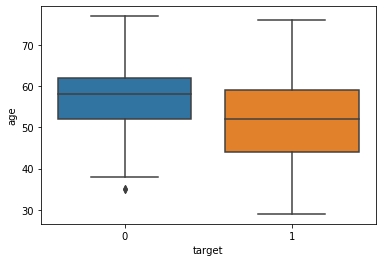

In [4]:
sns.boxplot(x='target',y='age', data=df)

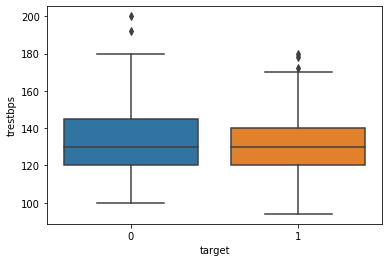

In [5]:
sns.boxplot(x='target',y='trestbps', data=df)

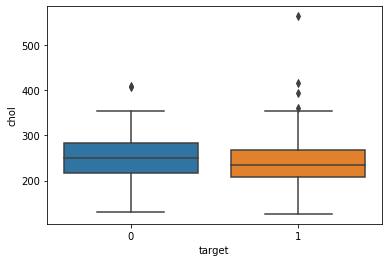

In [6]:
sns.boxplot(x='target',y='chol', data=df)

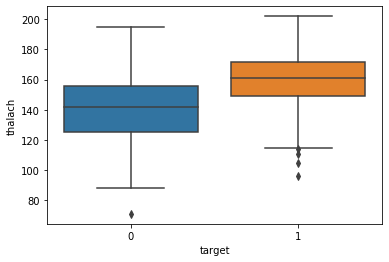

In [7]:
sns.boxplot(x='target',y='thalach', data=df)

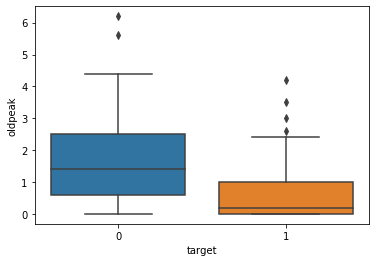

In [8]:
sns.boxplot(x='target',y='oldpeak', data=df)

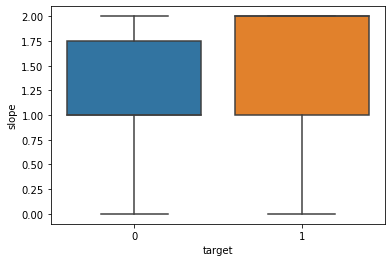

In [9]:
sns.boxplot(x='target',y='slope', data=df)

 
-0.01238 x + 1.218 - fit line
-1.8156728314318231 - R2


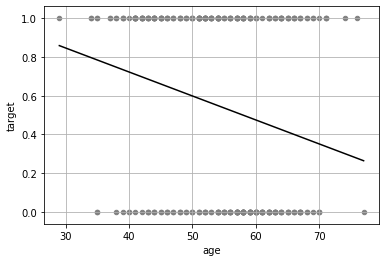

 
-0.3007 x + 0.75 - fit line
-0.6988906385296205 - R2


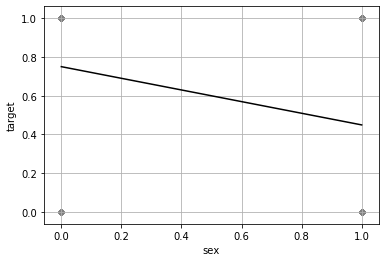

 
0.2097 x + 0.3418 - fit line
0.34375026984538715 - R2


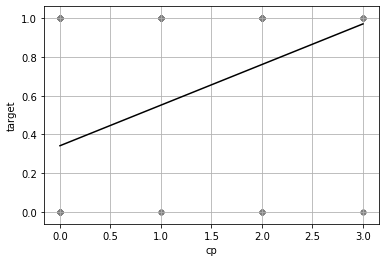

 
-0.004122 x + 1.087 - fit line
-1.185486418362352 - R2


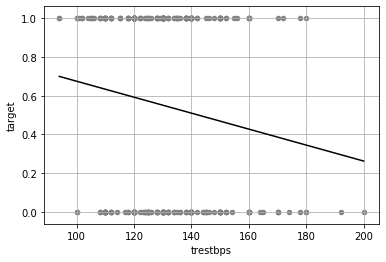

 
-0.0008204 x + 0.7466 - fit line
-0.16548052147853998 - R2


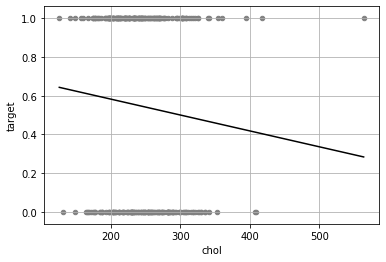

 
-0.03928 x + 0.5504 - fit line
-0.08107119799801388 - R2


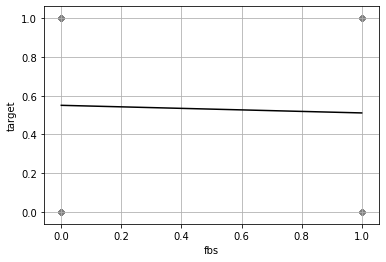

 
0.1302 x + 0.4758 - fit line
0.24338942492955684 - R2


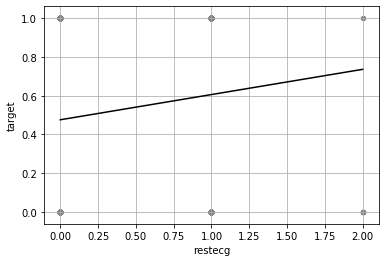

 
0.009185 x - 0.8299 - fit line
-7.543585350480022 - R2


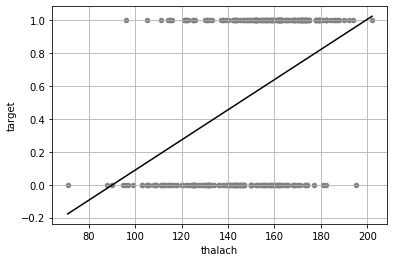

 
-0.4638 x + 0.6961 - fit line
-1.1837228954586485 - R2


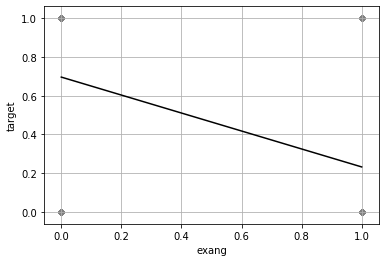

 
-0.185 x + 0.7369 - fit line
-0.4381555414491032 - R2


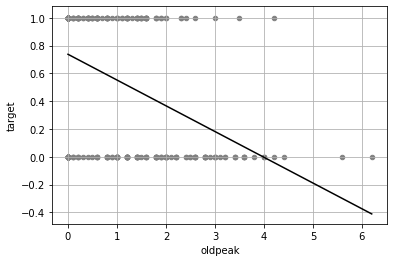

 
0.28 x + 0.1528 - fit line
0.2506342586411253 - R2


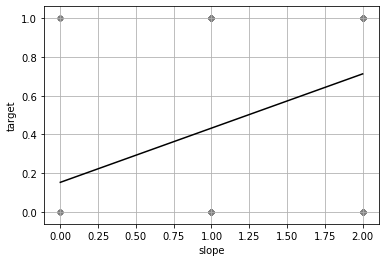

 
-0.1911 x + 0.6839 - fit line
-0.42371424138648206 - R2


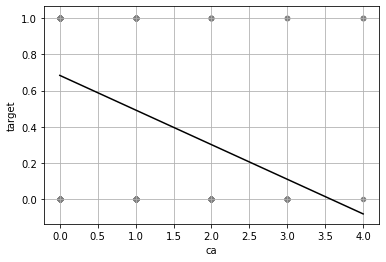

 
-0.2803 x + 1.193 - fit line
-1.6303700459952695 - R2


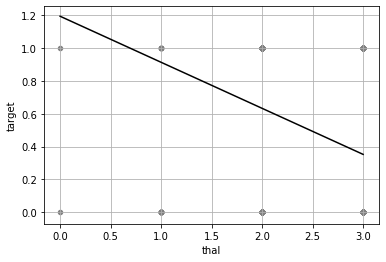

 
1 x - 1.601e-18 - fit line
1.0 - R2


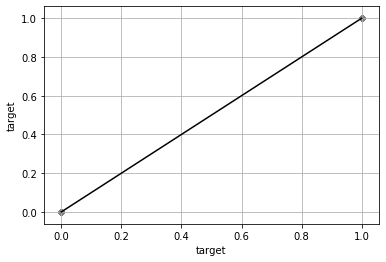

In [12]:
def plot_scatter_with_fitline(dataset, xaxis, yaxis):
    dataset = dataset.sort_values(xaxis)

    z = np.polyfit(dataset[xaxis], dataset[yaxis], 1)
    f = np.poly1d(z)
    print(f"{f} - fit line\n{r2_score(dataset[yaxis], f(dataset[yaxis]))} - R2")

    plt.scatter(x=dataset[xaxis], y=dataset[yaxis], marker='o', s=20, color='grey')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.plot(dataset[xaxis], f(dataset[xaxis]), color='black')
    plt.grid()
    plt.show()

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
    
for column in columns:
    plot_scatter_with_fitline(df, column, 'target')
